In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


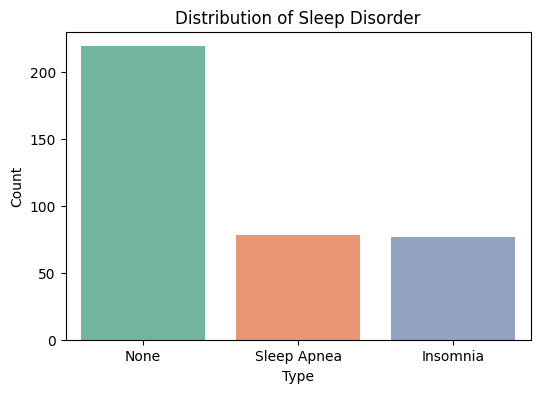

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sleep Disorder', hue='Sleep Disorder', palette='Set2', legend=False)
plt.title("Distribution of Sleep Disorder")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

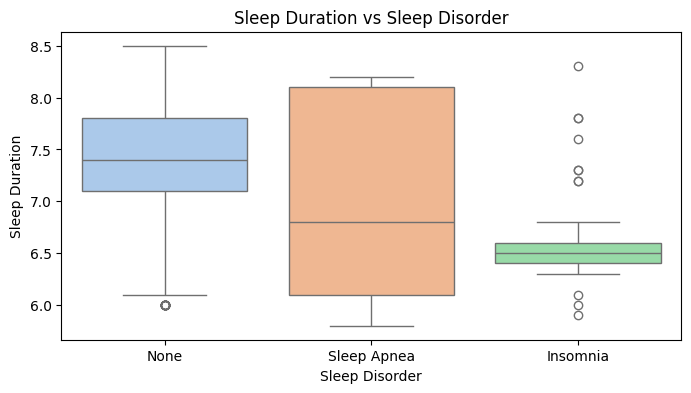

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Sleep Disorder', y='Sleep Duration', hue='Sleep Disorder', palette='pastel', legend=False)
plt.title("Sleep Duration vs Sleep Disorder")
plt.show()

In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])
df.drop('Blood Pressure', axis=1, inplace=True)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder
label_enc_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Step 1: Encode and Save Encoders
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # apply on original strings
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

In [ ]:
# Step 2: Load and Print Mappings
for col in label_enc_cols:
    with open(f'{col}_encoder.pkl', 'rb') as f:
        le = pickle.load(f)
    labels = le.classes_
    report_df = pd.DataFrame({
        'Encoded Value': range(len(labels)),
        'Original Label': labels
    })
    print(f"Mapping for {col}:")
    print(report_df)
    print("\n" + "="*30 + "\n")

Mapping for Gender:
   Encoded Value Original Label
0              0         Female
1              1           Male


Mapping for Occupation:
    Encoded Value        Original Label
0               0            Accountant
1               1                Doctor
2               2              Engineer
3               3                Lawyer
4               4               Manager
5               5                 Nurse
6               6  Sales Representative
7               7           Salesperson
8               8             Scientist
9               9     Software Engineer
10             10               Teacher


Mapping for BMI Category:
   Encoded Value Original Label
0              0         Normal
1              1  Normal Weight
2              2          Obese
3              3     Overweight


Mapping for Sleep Disorder:
   Encoded Value Original Label
0              0       Insomnia
1              1           None
2              2    Sleep Apnea




In [ ]:
df.drop('Person ID', axis=1, inplace=True)

In [ ]:
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                  'Physical Activity Level', 'Stress Level',
                  'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
1,219
2,78
0,77


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Print class distribution
print("Before SMOTE:", sorted(pd.Series(y_train).value_counts().items()))
print("After SMOTE:", sorted(pd.Series(y_train_smote).value_counts().items()))

Before SMOTE: [(0, 62), (1, 175), (2, 62)]
After SMOTE: [(0, 175), (1, 175), (2, 175)]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
import pickle

with open('Sleep Disorder_encoder.pkl', 'rb') as f:
    le_sleep_disorder = pickle.load(f)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le_sleep_disorder.classes_))

              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
        None       1.00      0.98      0.99        44
 Sleep Apnea       0.94      0.94      0.94        16

    accuracy                           0.96        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

Accuracy: 0.9600



<Figure size 600x600 with 0 Axes>

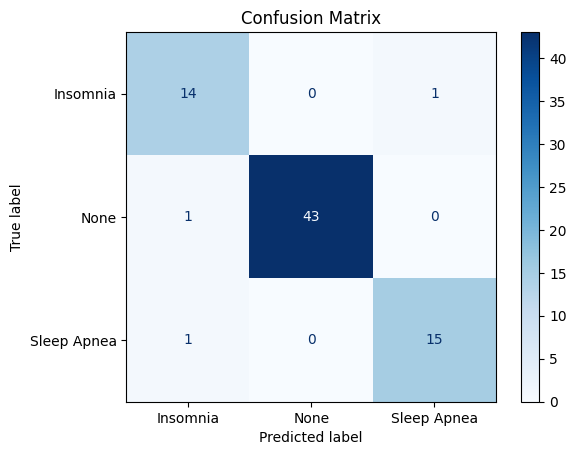

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Insomnia', 'None', 'Sleep Apnea'])

plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

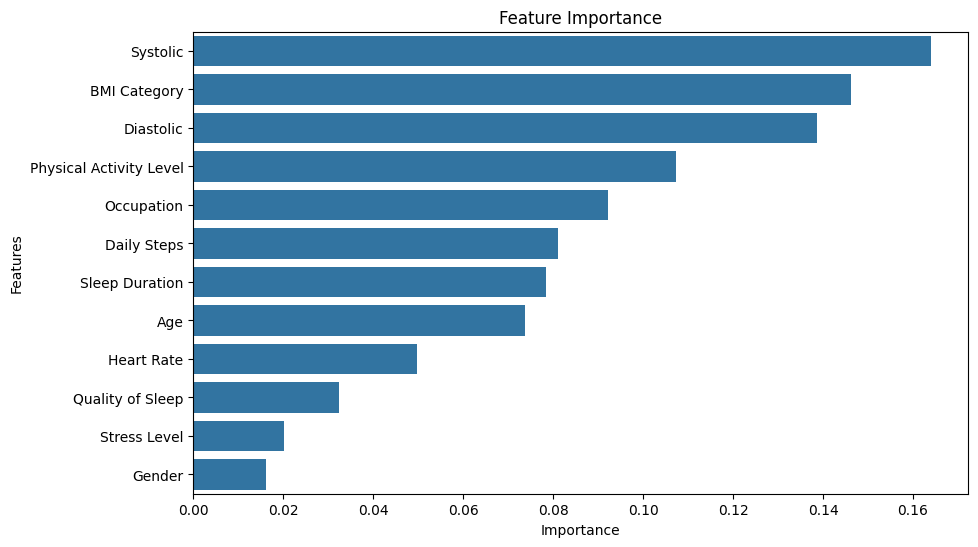

In [ ]:
# Feature Importance Plot (for Random Forest)
importances = model.feature_importances_
features = X_test.columns if hasattr(X_test, 'columns') else [f'Feature {i}' for i in range(X_test.shape[1])]

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'sleep_disorder_model.pkl')

['sleep_disorder_model.pkl']

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']